In [7]:
#The files is “hw2_data_1.txt”.  The data contains two X variables and one Y variable (two classes).
#Use rows 1-70 as training data, and use the remaining rows as testing data.

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import math as math
import scipy as sp
from functools import reduce
from sklearn import tree
import random as nr
import itertools as it
%matplotlib inline
"""
"""

if __name__ == '__main__':
    ### data path specification here
    #use relative path here since the script is in the same directory as the data file
    data1 = "hw2_data_1.txt"
    


    ### load the data into pandas dataframe
    total_df = pd.read_csv(data1, sep="\t") #separator is always important; use "," for this small dataset

    print(total_df.head()) # get a peek at what each column contains
    
   

   Sepal.Length  Sepal.Width Species
0           5.1          3.5  setosa
1           4.9          3.0  setosa
2           4.7          3.2  setosa
3           4.6          3.1  setosa
4           5.0          3.6  setosa


In [8]:
    print(total_df.shape) # know the shape of the data
    print(total_df.columns) # get the list of column names
    print(total_df.dtypes) # know the data types of each column (float, int, object(string) and etc.)



(100, 3)
Index(['Sepal.Length', 'Sepal.Width', 'Species'], dtype='object')
Sepal.Length    float64
Sepal.Width     float64
Species          object
dtype: object


In [9]:
Y = total_df["Species"].tolist()
def lab(s): 
    if(s == 'setosa'): return 1;
    else:return -1;
Y= list(map(lab,total_df["Species"].tolist()))
print(list(Y))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [10]:
# Write a function of perceptron. Using initial weights of all “1”s,
#and a learning rate of 1, run the perception on the training data. 
#Conduct prediction on the testing data, and report error rate. 
#Please remember to add the column of 1’s in the predictors.
#step function for activation
def step (x): 
    if((x >= 1) ): return 1;
    else: return -1;


#initalize weights, leanning rate, and threshold

df = total_df.values
dfTr = df[0:70,:]
dfTr[:,2] = list(map(lab,dfTr[:,2].tolist()))
print(dfTr)

[[5.1 3.5 1]
 [4.9 3.0 1]
 [4.7 3.2 1]
 [4.6 3.1 1]
 [5.0 3.6 1]
 [5.4 3.9 1]
 [4.6 3.4 1]
 [5.0 3.4 1]
 [4.4 2.9 1]
 [4.9 3.1 1]
 [5.4 3.7 1]
 [4.8 3.4 1]
 [4.8 3.0 1]
 [4.3 3.0 1]
 [5.8 4.0 1]
 [5.7 4.4 1]
 [5.4 3.9 1]
 [5.1 3.5 1]
 [5.7 3.8 1]
 [5.1 3.8 1]
 [5.4 3.4 1]
 [5.1 3.7 1]
 [4.6 3.6 1]
 [5.1 3.3 1]
 [4.8 3.4 1]
 [5.0 3.0 1]
 [5.0 3.4 1]
 [5.2 3.5 1]
 [5.2 3.4 1]
 [4.7 3.2 1]
 [4.8 3.1 1]
 [5.4 3.4 1]
 [5.2 4.1 1]
 [5.5 4.2 1]
 [4.9 3.1 1]
 [6.3 3.3 -1]
 [5.8 2.7 -1]
 [7.1 3.0 -1]
 [6.3 2.9 -1]
 [6.5 3.0 -1]
 [7.6 3.0 -1]
 [4.9 2.5 -1]
 [7.3 2.9 -1]
 [6.7 2.5 -1]
 [7.2 3.6 -1]
 [6.5 3.2 -1]
 [6.4 2.7 -1]
 [6.8 3.0 -1]
 [5.7 2.5 -1]
 [5.8 2.8 -1]
 [6.4 3.2 -1]
 [6.5 3.0 -1]
 [7.7 3.8 -1]
 [7.7 2.6 -1]
 [6.0 2.2 -1]
 [6.9 3.2 -1]
 [5.6 2.8 -1]
 [7.7 2.8 -1]
 [6.3 2.7 -1]
 [6.7 3.3 -1]
 [7.2 3.2 -1]
 [6.2 2.8 -1]
 [6.1 3.0 -1]
 [6.4 2.8 -1]
 [7.2 3.0 -1]
 [7.4 2.8 -1]
 [7.9 3.8 -1]
 [6.4 2.8 -1]
 [6.3 2.8 -1]
 [6.1 2.6 -1]]


In [11]:
def perc(it, lr):
    stit = str(it);
    w = np.ones([2, 1]) #weight
# Apply Perceptron learning rule
    for _ in range(it) :  #This is too help converge
        for i in range(70): #up to 70
            i = nr.randint(0,70); #thought that this would help
        #for the training set, calculate output
            y = step(0.01*w.transpose().dot(df[i, 0:2]));
            # print((Y[i], y))
            # Update weights
            #if both y are 0, then the update is w + 0
            #if both are 1, it is w+(1-1)*...
            #else it is w +lr*(x), where x is a missclassified point
            #w is thus a linear combination of misclassified points like the lecture 8 slides say
            w = w + lr*((Y[i] - y) )* df[i, 0:2].reshape(w.shape[0], 1);
           
    #now do prediction and errors 
    err = 0;
    for i in range(70,100) :
        #print(w.transpose().dot(df[i, 0:2]));
        y = step(w.transpose().dot(df[i, 0:2])-60);#bias
        err += int(Y[i] != y)

    print("For " +stit + " iterates, the error is "+ str(err)+"/30")
    print("w is " + str(w));
    return w;


In [16]:
perc(3,1)

For 3 iterates, the error is 12/30
w is [[-25.200000000000017]
 [75.80000000000003]]


array([[-25.200000000000017],
       [75.80000000000003]], dtype=object)

In [30]:
perc(5,1)

For 5 iterates, the error is 9/30
w is [[-27.2]
 [79.99999999999999]]


array([[-27.2],
       [79.99999999999999]], dtype=object)

In [24]:
perc(10,1)

For 10 iterates, the error is 7/30
w is [[-36.20000000000001]
 [94.80000000000003]]


array([[-36.20000000000001],
       [94.80000000000003]], dtype=object)

In [28]:
perc(20,1)

For 20 iterates, the error is 8/30
w is [[-40.39999999999998]
 [105.0]]


array([[-40.39999999999998],
       [105.0]], dtype=object)

In [31]:
#this is the code for just one desicion stump
#input
#x is the variables and outcomes to train on
#w is the weight to give each sample
#output
# an array of the two best cuts for each var [dimension 0, dimension1]
#the preformance and the dimension that gave the best cut as [pref d1, pref d2]

def stump(x,w):
    #x is data
    #w is weight on data/correct answer
    #both for rows and columns
    #multiply w and y element wise
    x[:,2]= np.multiply(x[:,2],w)
    ext=[0,0]
    inx = [0,0]
    val = [0,0] 

    for i in range(2):
        #sort samples in ascending order along dimension i
        x[np.argsort(x[:, i])]#print(i)
        #x[np.argsort(x[:, 1])]
        #x[x[:,i].argsort( axis=0, order=None)]
        #print(list(x))
        #as the y labels are +/- 1, do a cumulative sum with the weight
        #the array should have each element map to the sum reduction of it's subsequence
        ex = list(it.accumulate(x[:,2].tolist()))
        #this max will be the most pure in terms of ones to the left of it
        print(max(ex),i)
        ind = ex.index(max(ex))
        ex1 = x[ind,i]
        
      
        if (max(ex)> val[0]):
            val[0] = max(ex)
            val[1] = i
            
        #return the info needed to decide the class, ex for sign, ind for cut off, i to know if in x1 or x2 var
        ext[i]=ex1
        inx[i]=ind
        
    return [ext, val]
            

In [32]:
#adative boost
#input:
#n is the number of itterataes/ learnes to make
#X is the data with outcomes to train on
def adab2( X,n):
    #n initail weights for the n learners to have
    #the weights are all initialized to be equal, 1/n
    w = np.ones(70)/70
    #the container for the learners
    l = []
    #the weight on each learner
    lw = np.ones(n)

    
    #for the number of epochs, train a classifier with the weight adjusting at each iteration
    for i in range(n):
        #train a classifier on the weigthed data
        s = stump(X,w)
        #this stump gives two lists: where to cut and the value of that cut, the index corresponds to the index of that 
        #dimension
        #find out if the x1 or x2 cut is more valuable
        ind = s[1].index(max(s[1]))
        s2 = [ind, s[0][ind] ]
        
        #then predict on x
        yp = list(map(lambda h:step(int(h)),(X[:,ind] <= s[0][ind])))
        y = X[:,2].astype('int')
        
        #find the error of that classifier and use it for the updates
        #weighted sum error for misclassified points
        e = w.dot(yp != y)
        #use that error to find the voting weight of this stump
        a = (np.log((1 - e)/e) / 2)
        lw[i] = a
        l.append(s2)
        
        #find the new weights of the samples
        w = np.asarray(w) * np.exp(- a * y * yp)
        w = w / w.sum()
        lw = lw/lw.sum()

    return [lw,l]

In [33]:
#adative boost
#input:
#n is the number of itterataes/ learnes to make
#X is the data with outcomes to train on
def adab( X,n):
    #n initail weights for the n learners to have
    #the weights are all initialized to be equal, 1/n
    w = np.ones(70)/70
    #the container for the learners
    l = []
    #the weight on each learner
    lw = np.ones(n)

    
    #for the number of epochs, train a classifier with the weight adjusting at each iteration
    for i in range(n):
        #train a classifier on the weigthed data
        s = tree.DecisionTreeClassifier(max_depth=1)
        s.fit(X[:,0:1], X[:,2].astype('int'), sample_weight=w)
        yp = s.predict(X[:,0:1])
        y = X[:,2].astype('int')
        
        #find the error of that classifier and use it for the updates
        #weighted sum error for misclassified points
        e = w.dot(yp != y)
        #use that error to find the voting weight of this stump
        a = (np.log((1 - e)/e) / 2)
        lw[i] = a
        l.append(s)
        
        #find the new weights of the samples
        w = np.asarray(w) * np.exp(- a * y * yp)
        w = w / w.sum()
        lw = lw/lw.sum()

    return [lw,l]

In [35]:
#3
#predict and report error
t = adab(df[0:70, :],3)

#predict on the test set
# X input, y output
y = np.zeros(30)
for (s, w) in zip(t[1], t[0]):
    y = y + w * s.predict(df[70:100, 0:1])
print("the prediction's confidence (abs) are ", list(y))
y = list(map(lambda j:step(int(j>0)),y))
print("predicted class ",list(y))
yt = Y[70:100]
print("true class ",yt)
#see where the values are not equal
e = reduce((lambda i,j: i+j), list(map(lambda x, z: int(x != z),y , yt)) )/30
print("error rate is ",e)

the prediction's confidence (abs) are  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6348449080299385, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6348449080299385]
predicted class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
true class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
error rate is  0.0


In [36]:
#5
#predict and report error
t = adab(df[0:70, :],5)

#predict on the test set
# X input, y output
y = np.zeros(30)
for (s, w) in zip(t[1], t[0]):
    y = y + w * s.predict(df[70:100, 0:1])
print("the prediction's confidence (abs) are ", list(y),"\n")
y = list(map(lambda j:step(int(j>0)),y))
print("predicted class ",list(y), "\n")
yt = Y[70:100]
print("true class ",yt)
#see where the values are not equal
e = reduce((lambda i,j: i+j), list(map(lambda x, z: int(x != z),y , yt)) )/30
print("error rate is ",e)

the prediction's confidence (abs) are  [0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, 0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, 0.22407604972873826, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, -0.45134848816932016, 0.22407604972873826] 

predicted class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1] 

true class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
error rate is  0.06666666666666667


In [37]:
#10, 20
#predict and report error
t = adab(df[0:70, :],10)

#predict on the test set
# X input, y output
y = np.zeros(30)
for (s, w) in zip(t[1], t[0]):
    y = y + w * s.predict(df[70:100, 0:1])
print("the prediction's confidence (abs) are ", list(y),"\n")
y = list(map(lambda j:step(int(j>0)),y))
print("predicted class ",list(y), "\n")
yt = Y[70:100]
print("true class ",yt)
#see where the values are not equal
e = reduce((lambda i,j: i+j), list(map(lambda x, z: int(x != z),y , yt)) )/30
print("error rate is ",e)

the prediction's confidence (abs) are  [0.16653450999474034, 0.16653450999474034, -0.08657114163958951, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, 0.6246200265953243, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, 0.6246200265953243, 0.16653450999474034, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, 0.16189269365757392, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, 0.16189269365757392] 

predicted class  [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1] 

true class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
error rate is  0.1


In [38]:
#20
#predict and report error
t = adab(df[0:70, :],20)

#predict on the test set
# X input, y output
y = np.zeros(30)
for (s, w) in zip(t[1], t[0]):
    y = y + w * s.predict(df[70:100, 0:1])
print("the prediction's confidence (abs) are ", list(y),"\n")
y = list(map(lambda j:step(int(j>0)),y))
print("predicted class ",list(y), "\n")
yt = Y[70:100]
print("true class ",yt)
#see where the values are not equal
e = reduce((lambda i,j: i+j), list(map(lambda x, z: int(x != z),y , yt)) )/30
print("error rate is ",e)

the prediction's confidence (abs) are  [0.17691745173094958, 0.17691745173094958, -0.11769271071829987, 0.34740210853384673, 0.17691745173094958, 0.17691745173094958, 0.34740210853384673, 0.34740210853384673, 0.17691745173094958, 0.17691745173094958, 0.34740210853384673, 0.17691745173094958, 0.34740210853384673, 0.17691745173094958, 0.17691745173094958, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, 0.12825345084393705, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, -0.5572407846287333, 0.12825345084393705] 

predicted class  [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1] 

true class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
error rate is  0.1


In [40]:
#1
#predict and report error
t = adab(df[0:70, :],10)

#predict on the test set
# X input, y output
y = np.zeros(30)
for (s, w) in zip(t[1], t[0]):
    y = y + w * s.predict(df[70:100, 0:1])
print("the prediction's confidence (abs) are ", list(y),"\n")
y = list(map(lambda j:step(int(j>0)),y))
print("predicted class ",list(y), "\n")
yt = Y[70:100]
print("true class ",yt)
#see where the values are not equal
e = reduce((lambda i,j: i+j), list(map(lambda x, z: int(x != z),y , yt)) )/30
print("error rate is ",e)

the prediction's confidence (abs) are  [0.16653450999474034, 0.16653450999474034, -0.08657114163958951, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, 0.6246200265953243, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, 0.6246200265953243, 0.16653450999474034, 0.6246200265953243, 0.16653450999474034, 0.16653450999474034, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, 0.16189269365757392, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, -0.6246200265953243, 0.16189269365757392] 

predicted class  [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1] 

true class  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
error rate is  0.1


In [17]:
#then for part 2, load data 2
data2 = "hw2_data_2.txt"
    


### load the data into pandas dataframe
total_df2 = pd.read_csv(data2, sep="\t") #separator is always important; use "," for this small dataset

print(total_df2.head()) # get a peek at what each column contains
    
   

     X1    X2    X3     X4    X5     X6    X7    X8    X9   X10  ...    X17  \
0  2.13  3.76  4.93  2.030  6.37  1.260  8.45  2.58  6.57  2.65  ...  1.310   
1  3.40  3.33  4.19  0.816  6.80  0.236  7.45  4.33  4.66  1.57  ...  2.580   
2  1.17  4.30  4.25  1.640  4.68 -2.100  6.40  4.04  4.11  3.03  ...  2.850   
3  2.63  2.97  5.79  1.140  5.14 -0.351  6.89  4.69  5.31  3.50  ...  2.330   
4  3.49  1.11  4.99  0.232  4.99 -0.486  8.65  4.45  6.04  2.25  ...  0.931   

    X18   X19   X20   X21   X22   X23   X24   X25  y  
0  2.77  3.97  7.36  4.99  6.97  5.89  7.04  6.04  1  
1  3.66  4.46  6.19  3.58  7.71  6.38  7.22  4.41  1  
2  4.09  3.77  5.91  4.37  7.66  6.45  7.28  5.14  1  
3  3.38  4.27  6.36  5.70  7.76  3.59  7.34  5.86  1  
4  4.39  4.91  7.72  6.71  5.74  7.08  8.15  3.00  0  

[5 rows x 26 columns]


In [18]:
print(total_df2.shape) # know the shape of the data
print(total_df2.columns) # get the list of column names
print(total_df2.dtypes) # know the data types of each column (float, int, object(string) and etc.)

df2 = total_df2.values
X = df2[0:600,0:25]
y = df2[0:600, 25]

tX = df2[600:800,0:25]
ty = df2[600:800, 25]
#test error to rank preformance
te = [ 0, 0, 0, 0]
ln = ['radial', 'sigmoid', 'polynomial', 'rand forest']

(800, 26)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'y'],
      dtype='object')
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
X24    float64
X25    float64
y        int64
dtype: object


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.02497771, 0.02248666, 0.02247927, 0.02305975, 0.02205021,
       0.02211342, 0.0217042 , 0.01404774, 0.02428908, 0.02531197,
       0.02671938, 0.01849201, 0.01865923]), 'std_fit_time': array([4.00167247e-03, 4.19050675e-04, 8.27527839e-04, 1.57719855e-03,
       5.60791769e-05, 1.12000827e-04, 1.65474279e-03, 2.97041635e-04,
       1.61940624e-04, 1.17288200e-04, 9.41153588e-04, 4.01609639e-05,
       4.45286016e-04]), 'mean_score_time': array([0.00259125, 0.00232606, 0.00232992, 0.00247629, 0.00229366,
       0.00229959, 0.00232782, 0.00148311, 0.00219636, 0.002333  ,
       0.00270193, 0.00194495, 0.00199201]), 'std_score_time': array([3.51832565e-04, 6.91221309e-05, 8.15160200e-05, 2.77278082e-04,
       3.62539028e-05, 5.48136499e-05, 1.68071611e-04, 2.92678981e-05,
       7.07589069e-05, 3.31403626e-05, 2.18006096e-04, 2.12090848e-05,
       1.39278594e-04]), 'param_gamma': masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
     

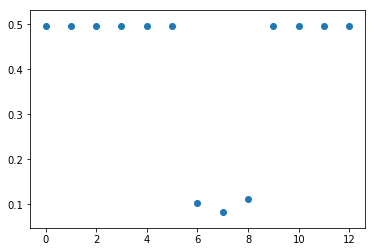

In [19]:
#question 3
#Run Support Vector Machine with three different kernels: Radial, polynomial, and sigmoid. 
#Keep every other parameter default, except the following:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#For radial kernel, run a grid search for the best gamma parameter.
#radial svm
# Create a SVC classifier using an RBF kernel
#range of gamma to search
g = np.logspace(-9, 3, 13)
#training with 10 fold cv
param_grid = {'gamma':g, 'kernel':['rbf']}
rsvm = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=10)
rsvm.fit(X, y)

#Plot the cross-validation error rate v.s. gamma parameters.
res = rsvm.cv_results_
print(res)
re = list(map(lambda x:float(1.0 -x), res['mean_test_score']))
rg = list(range(13)) #
tg = list(map(lambda x: float(x), res['param_gamma']))
plot = plt.scatter(rg,re)
print('the error rate for the gamma ', tg, 'is: ', re)


 
#Fit the final model using the selected gamma, and conduct prediction on the testing data. 
print('the best is ', rsvm.best_params_)
pred = 1 - rsvm.score(tX,ty)
#Report testing error rate. 
print('radial-10cv has a test error rate of ', pred)
te[0] = pred



{'mean_fit_time': array([0.02184739, 0.02049401, 0.02039363, 0.02057948, 0.02065523,
       0.02035496, 0.02538843, 0.02558558, 0.01210611, 0.0124285 ,
       0.01201367, 0.01208632, 0.01210067]), 'std_fit_time': array([1.24109779e-03, 3.18065709e-04, 8.81599855e-05, 3.98483361e-04,
       7.73741369e-04, 9.92707197e-05, 1.29686374e-04, 2.21270966e-04,
       3.93240423e-05, 5.81336452e-04, 1.80030594e-04, 5.64815627e-05,
       3.84722860e-05]), 'mean_score_time': array([0.0025548 , 0.00226765, 0.00227585, 0.00228786, 0.00227704,
       0.0022589 , 0.00279534, 0.00284441, 0.00143816, 0.00151136,
       0.00145512, 0.001443  , 0.00147874]), 'std_score_time': array([3.20722268e-04, 5.05387555e-05, 6.54272190e-05, 6.62370410e-05,
       4.91865330e-05, 2.42426680e-05, 6.53039978e-05, 2.76421744e-05,
       1.90103350e-05, 8.26473422e-05, 5.28527046e-05, 2.10549930e-05,
       1.22874610e-04]), 'param_gamma': masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
     

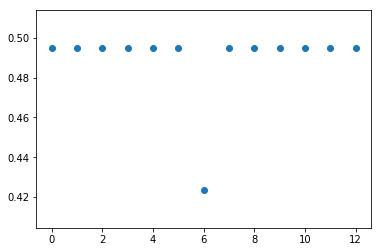

In [20]:
#For sigmoid kernel, conduct the same procedure as for the radial kernel. 
#Use 10-fold cross-validation to select the best gamma parameter. 
#Plot the cross-validation error rate v.s. gamma parameters. 
#Fit the final model using the selected gamma, and conduct prediction on the testing data. 
#Report testing error rate. 



g = np.logspace(-9, 3, 13)
#training with 10 fold cv
param_grid = {'gamma':g, 'kernel':['sigmoid']}
rsvm = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=10)
rsvm.fit(X, y)

#Plot the cross-validation error rate v.s. gamma parameters.
res = rsvm.cv_results_
print(res)
re = list(map(lambda x:float(1.0 -x), res['mean_test_score']))
rg = list(range(13)) #
tg = list(map(lambda x: float(x), res['param_gamma']))
plot = plt.scatter(rg,re)
print('the error rate for the gamma ', tg, 'is: ', re)


 
#Fit the final model using the selected gamma, and conduct prediction on the testing data. 
print('the best is ', rsvm.best_params_)
pred = 1 - rsvm.score(tX,ty)
#Report testing error rate. 
print('sigmoid-10cv has a test error rate of ', pred)
te[1] = pred


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

{'mean_fit_time': array([0.01291113, 0.00767145, 0.01601577, 0.02798727, 0.01992438,
       0.01786034, 0.01683226, 0.01517081, 0.01388986, 0.01309428,
       0.01292491, 0.0135159 , 0.0122787 ]), 'std_fit_time': array([0.00074381, 0.00027517, 0.00105193, 0.00341477, 0.00125348,
       0.00084731, 0.00140471, 0.00093557, 0.00087198, 0.00084281,
       0.00109664, 0.00114951, 0.00094636]), 'mean_score_time': array([0.00163679, 0.00080621, 0.00059686, 0.0007921 , 0.0006182 ,
       0.0006578 , 0.00068369, 0.00069292, 0.00066977, 0.00071619,
       0.00069156, 0.00080874, 0.00075104]), 'std_score_time': array([1.98194134e-04, 2.47136125e-05, 6.98637389e-05, 1.50179977e-04,
       6.09417150e-05, 8.22792845e-05, 6.17188480e-05, 7.81027424e-05,
       6.93992050e-05, 1.64068450e-04, 6.37084780e-05, 1.04474872e-04,
       1.25475621e-04]), 'param_degree': masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
             mask=[False, False, False, False, False, False, False, False,
 

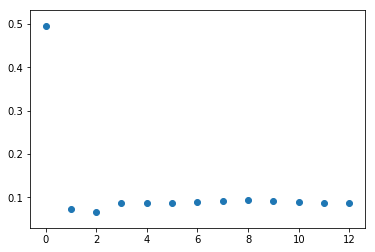

In [21]:

#For the polynomial kernel, 
#tune the degree parameter using 10 fold cross validation. 
#Plot the cross-validation error rate v.s. degree parameters. 
#Fit the final model using the selected degree, and conduct prediction on the testing data. 
#Report testing error rate. 



g = list(range(13))
#training with 10 fold cv
param_grid = {'degree':g, 'kernel':['poly']}
rsvm = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=10)
rsvm.fit(X, y)

#Plot the cross-validation error rate v.s. gamma parameters.
res = rsvm.cv_results_
print(res)
re = list(map(lambda x:float(1.0 -x), res['mean_test_score']))
rg = list(range(13)) #
plot = plt.scatter(rg,re)
print('the error rate for the degree ', g, 'is: ', re)


 
#Fit the final model using the selected gamma, and conduct prediction on the testing data. 
print('the best is ', rsvm.best_params_)
pred = 1 - rsvm.score(tX,ty)
#Report testing error rate. 
print('poly-10cv has a test error rate of ', pred)
te[2] = pred






/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


the error rate for # trees  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000] is:  [0.20333333333333337, 0.15000000000000002, 0.1383333333333333, 0.11166666666666669, 0.09166666666666667, 0.08833333333333337, 0.08833333333333337, 0.08333333333333337, 0.08499999999999996, 0.09166666666666667, 0.08333333333333337, 0.07166666666666666, 0.07333333333333336, 0.06833333333333336, 0.06666666666666665, 0.06499999999999995, 0.06999999999999995, 0.06666666666666665, 0.06333333333333335, 0.06333333333333335, 0.06166666666666665, 0.06333333333333335, 0.0683333333

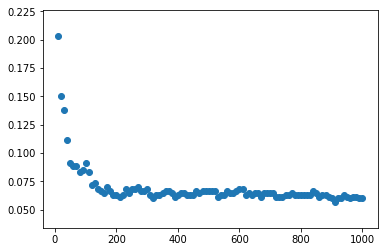

In [22]:
#(4) Run Random Forest on the training data. Keeping all other parameter at default, 
#fit the model using different number of trees (10, 20, 30,……, 1000). 

from sklearn.ensemble import RandomForestClassifier

g = list(range(10,1001,10))
#training 


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
rf = RandomForestClassifier(n_estimators=1,warm_start=True, oob_score=True)

# to store error
error_rate = []


for i in g:
    rf.set_params(n_estimators=i)
    rf.fit(X, y)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)



#Plot the OOB error rate v.s. the number of trees. 
plot = plt.scatter(g,error_rate)
print('the error rate for # trees ', g, 'is: ', error_rate)

#Select the number of trees based on when the OOB error rate first stabilizes 
#(close enough to the error rate at 1000 trees, with a difference within 1%).
#the error at 1000's lower and upper bounds
le = error_rate[len(g)-1]*1.01
ue  = error_rate[len(g)-1]*0.99
j =0
for i in error_rate:
    
    if (i<=le):
        print( 'stable error is', i, ' for ',g[j],'trees')
        break
    j=j+1



#Select the number of trees based on when the OOB error rate first stabilizes 
# and conduct prediction on the testing data. 
#train
rf = RandomForestClassifier(n_estimators=680,warm_start=True, oob_score=True)
rf.fit(X, y)
#predict
pred = 1 - rf.score(tX,ty)
#Report testing error rate. 
print('random forest has a test error rate of ', pred)
te[3] = pred



In [23]:

#Rank the predictors based on their importance score. 
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Rank of predictors based on importance score:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Rank of predictors based on importance score:
1. feature 7 (0.297669)
2. feature 1 (0.245494)
3. feature 5 (0.037635)
4. feature 21 (0.023690)
5. feature 20 (0.022747)
6. feature 11 (0.022371)
7. feature 22 (0.021630)
8. feature 10 (0.021381)
9. feature 2 (0.020894)
10. feature 9 (0.020565)
11. feature 3 (0.019165)
12. feature 8 (0.019137)
13. feature 17 (0.019008)
14. feature 14 (0.018808)
15. feature 24 (0.018663)
16. feature 15 (0.018611)
17. feature 16 (0.018535)
18. feature 19 (0.018336)
19. feature 0 (0.017693)
20. feature 23 (0.017472)
21. feature 13 (0.017186)
22. feature 4 (0.016689)
23. feature 18 (0.016092)
24. feature 6 (0.015498)
25. feature 12 (0.015032)


In [ ]:
import sys
!{sys.executable} -m pip install xgboost




  Using cached https://files.pythonhosted.org/packages/6a/49/7e10686647f741bd9c8918b0decdb94135b542fe372ca1100739b8529503/xgboost-0.82-py2.py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/5f/c48860704092933bf1c4c1574a8de1ffd16bf4fde8bab190d747598844b2/scipy-1.2.1-cp36-cp36m-manylinux1_x86_64.whl


In [24]:
import xgboost as xgb

In [26]:

#(5) Run gradient boosting of trees at default setting on the training data. 
gbt = xgb.XGBClassifier()
gbt.fit(X, y)
print('the gb treee is: ', gbt)
#Predict the testing data. Report the testing data error rate.
pred = 1 - gbt.score(tX,ty)
#Report testing error rate. 
print('the XGB gradient boosted tree has a test error rate of ', pred, '\n')

#Report variable importance. 
print('with feature importance ', gbt.feature_importances_)
print('\nto compare, the error for', ln, ' are ', te)



the gb treee is:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
the XGB gradient boosted tree has a test error rate of  0.05500000000000005 

with feature importance  [0.01786581 0.24626149 0.02424451 0.03576612 0.01582746 0.05910151
 0.01855204 0.24128076 0.02423516 0.0006017  0.02172776 0.02791414
 0.03062525 0.01270761 0.01083593 0.02823354 0.01190676 0.02502947
 0.00667074 0.02407626 0.01209118 0.02648786 0.03783779 0.01901644
 0.02110271]

to compare, the error for ['radial', 'sigmoid', 'polynomial', 'rand forest']  are  [0.07999999999999996, 0.385, 0.06499999999999995, 0.050000000000000044]
